In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_digits

In [3]:
digits = load_digits()

In [4]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
digits.data[3]

array([ 0.,  0.,  7., 15., 13.,  1.,  0.,  0.,  0.,  8., 13.,  6., 15.,
        4.,  0.,  0.,  0.,  2.,  1., 13., 13.,  0.,  0.,  0.,  0.,  0.,
        2., 15., 11.,  1.,  0.,  0.,  0.,  0.,  0.,  1., 12., 12.,  1.,
        0.,  0.,  0.,  0.,  0.,  1., 10.,  8.,  0.,  0.,  0.,  8.,  4.,
        5., 14.,  9.,  0.,  0.,  0.,  7., 13., 13.,  9.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

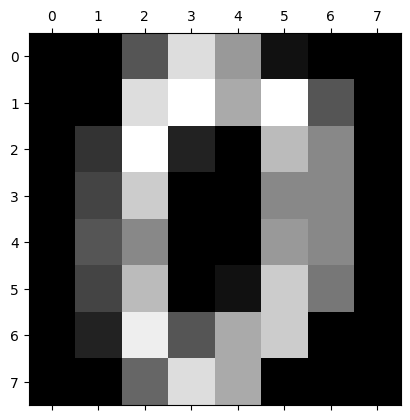

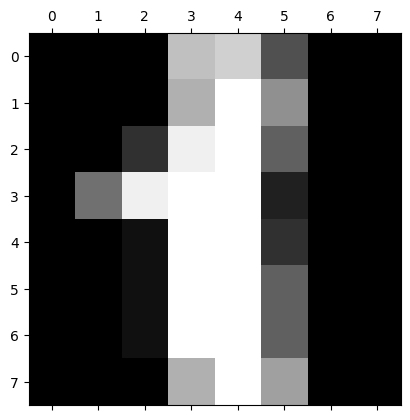

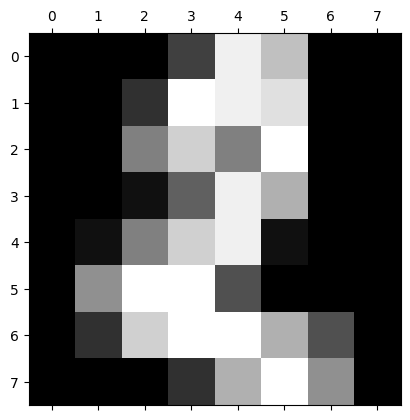

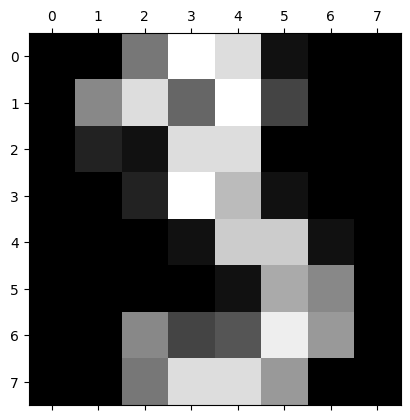

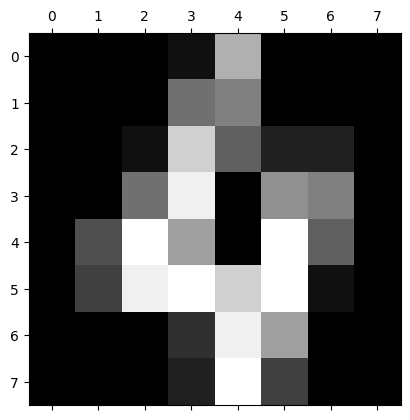

In [6]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [7]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [8]:
#we can train our model using the data and the target
#split the data set
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test = train_test_split(digits.data, digits.target,train_size=0.8)
len(x_train)

1437

In [10]:
len(x_test)

360

In [11]:
#model training
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [12]:
model.fit(x_train,y_train)

C:\Users\kisho\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
model.score(x_test,y_test)

0.9361111111111111

In [14]:
#now predict with our own choices
digits.target[100]

np.int64(4)

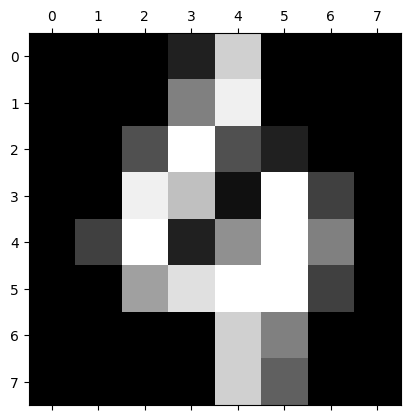

In [15]:
plt.matshow(digits.images[100])

In [16]:
# predict with the same number with data
model.predict([digits.data[100]])

array([4])

In [17]:
#predicctorr first 5 num
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [18]:
#for now we can use confusion matrics to find out where our model did'nt work well, bec score = 95%
y_predicted = model.predict(x_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted)
cm

array([[29,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 47,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  1, 35,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 36,  0,  1,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 34,  0,  0,  1,  0,  0],
       [ 0,  1,  0,  0,  0, 22,  1,  0,  0,  3],
       [ 0,  1,  0,  0,  2,  0, 34,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 38,  0,  2],
       [ 0,  4,  0,  0,  0,  0,  0,  0, 28,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 34]])

Text(95.72222222222221, 0.5, 'Truth')

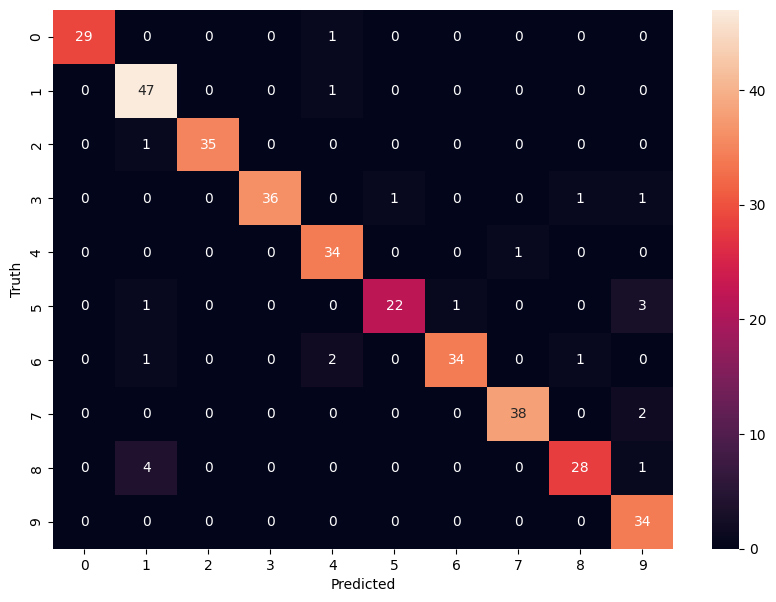

In [19]:
import seaborn as sb
plt.figure(figsize=(10,7))
sb.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
